# Detecting Fraudulent Credit Card Activity
## Using Imbalanced Data
---
Raw data pulled from [Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud/data)

Original data credited to: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

---
##### This notebook is broken up into two primary sections:
* Exploratory Data Analysis
* Model Fitting & Tuning

# Exploratory Data Analysis

In [32]:
# Import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.style.use('fivethirtyeight')
%matplotlib inline

In [47]:
# Load and describe raw data
cc_fraud = pd.read_csv('./data/creditcard.csv')
cc_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Principal Component Analysis (PCA)
Unforunately, this data has already been transformed using PCA.  The only original features we can access are the purchase amount ('Amount') and time.  According to the original contributor's this is due to confidentiality agreements with the commercial vendor.

In any case, the PCA-transformed will prove to be sufficient for our modeling purposes.  In fact, PCA can be a fairly common unsupervised method for data pre-processing.  The biggest downside is that our model results will give us very little information to conceptually infer what factor's contribute to a purchase's likelihood of being fraudulent.

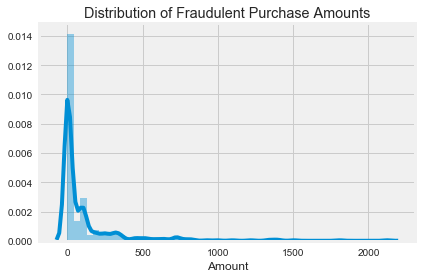

In [33]:
# Distribution of fraudulent purchase amounts
sns.distplot(cc_fraud[(cc_fraud['Class'] == 1)].Amount);
plt.title('Distribution of Fraudulent Purchase Amounts');

In [40]:
#  Counts/% of Target Classes
print 'Target Class Counts: '
print cc_fraud['Class'].value_counts()
print '###################################'
print 'Target Class %: '
print (cc_fraud['Class'].value_counts()/len(cc_fraud))*100

Target Class Counts: 
0    284315
1       492
Name: Class, dtype: int64
###################################
Target Class %: 
0    99.827251
1     0.172749
Name: Class, dtype: float64


**As you can see, there is a dramatic class imbalance in our target labels.  Unsurprisingly, far more credit card purchases are legitiamte than fraudulent!  We will discuss how to deal with this in the Model Fitting section of this notebook.**

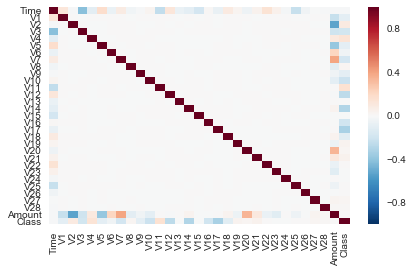

In [43]:
# Plot a heat map of correlation matrix for original data
sns.heatmap(cc_fraud.corr());

Notice that:
* There are several variables that are fairly highly correlated with the class label
* None of the input features are highly correlated with one another

This second point is a product of the fact that the original data has already been PCA transformed.  By performing PCA on the underlying raw data, the provider has actually transformed the data into an orthnomoral vector space, thereby mnimizing the correlation between transformed input features.

In [44]:
# Identify highly-correlated (both positively and negatively) variables with target variable
corr_ranks = cc_fraud.corr()['Class']
ranked = np.abs(corr_ranks).sort_values(ascending=False)
print ranked

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64


We grab the ten most highly-correlated features with our class labels, as well as the purchase amount to use as potential input features for our model.

In [9]:
top_features = list(ranked.index[1:11])
print list(top_features)

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']


In [10]:
top_features.append('Amount')

# Model Fitting and Parameter Tuning
---

In this section, we will consider data pre-processing in order to fit a classification model to the transaction data.  We will also explore several types of predictive models, including Random Forest Classifiers and Logistic Regression.

In [11]:
# Split data into input and target variables
X_all = cc_fraud[top_features]
y_all = cc_fraud['Class']

# Perform a train/test split on the entire data set for demonstration purposes
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all,y_all)

In [12]:
# Create a balanced dataset on which to train/test using an undersampling approach to the legitimate purchase class
fraud = cc_fraud[(cc_fraud['Class']==1)]
not_fraud = cc_fraud[(cc_fraud['Class']==0)]

fraud_sample = fraud.sample(250)
not_fraud_sample = not_fraud.sample(250)

balanced = fraud_sample.append(not_fraud_sample)
balanced['Class'].value_counts()

1    250
0    250
Name: Class, dtype: int64

In [13]:
# Split balanced sample set into input and target variables
# Split into train/test sets
X = balanced[top_features]
y = balanced['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

In [15]:
# Function to calculate accuracy score, true positive rate, false positive rate, and AUROC for any model/dataset
def advanced_metrics(model,x,y):
    cfm = confusion_matrix(y,model.predict(x))
    print cfm
    score = model.score(x,y)
    tpr = cfm[1][1]/float(cfm[1][0]+cfm[1][1])
    fpr = cfm[0][1]/float(cfm[0][0]+cfm[0][1])
    auroc = roc_auc_score(y, model.predict(x))
    print 'True Positive Rate: ', tpr
    print 'False Positive Rate: ', fpr
    print 'Accuracy Score: ', score
    print 'AUROC: ', auroc
    return score,tpr,fpr,auroc

# Logistic Regression
---

#### Examine the performance of a logistic regression model in trying to identify fraudulent credit card purchases.


### Unbalanced Classes
First, we will consider a classifier trained on the training split of the entire dataset, to include the unbalanced classes.

In [31]:
# Initialize model object
logit_skewed = LogisticRegression()
# Fit to unbalanced training set
logit_skewed.fit(X_all_train,y_all_train)
# Print performance metrics
skew_test_score, skew_test_tpr, skew_test_fpr, skew_test_auroc = advanced_metrics(logit_skewed,X_all_test,y_all_test)

[[71083     6]
 [   48    65]]
True Positive Rate:  0.575221238938
False Positive Rate:  8.44012435117e-05
Accuracy Score:  0.999241594337
AUROC:  0.787568418847


**Notice how the accuracy score is very high, but TPR and AUROC are both fairly low.  This is due to the significantly unbalanced classes in the entire dataset.  In fact, the model would achieve a >98% accuracy by simply always classifying purchases as legitimate.**

This highlights the need to somehow deal with the class imbalance- our primary strategy will be to undersample the legitimate (0) class to create an even distribution of outcomes in the training and test data.  Moving forward, we will use the train/test split from the sampled balanced dataset (X_train, X_test, y_train, y_test).

In [45]:
# Initialize and fit against balanced training set
logit = LogisticRegression()

logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# Print accuracy, tpr, fpr, and AUROC against balanced test set
logit_test_score, logit_test_tpr, logit_test_fpr, logit_test_auroc = advanced_metrics(logit,X_test,y_test)

[[64  6]
 [ 8 72]]
True Positive Rate:  0.9
False Positive Rate:  0.0857142857143
Accuracy Score:  0.906666666667
AUROC:  0.907142857143


## Performance Against Entire Dataset
Now we turn the Logistic Regression model towards the entire original dataset (not just the class-balanced subset) and consider the logistic regression's performance.  We will consider the True Positive Rate and False Positive Rate of the classifier, along with its accuracy and AUROC.

In [46]:
# Evaluate performance metrics of model trained on balanced training set against the entire original dataset
logit_all_score, logit_all_tpr, logit_all_fpr, logit_all_auroc = advanced_metrics(logit,X_all,y_all)

[[277091   7224]
 [    47    445]]
True Positive Rate:  0.904471544715
False Positive Rate:  0.0254084378242
Accuracy Score:  0.974470430853
AUROC:  0.939531553446


# Random Forest Classifier

Max Depth:  1
[[70  0]
 [13 67]]
True Positive Rate:  0.8375
False Positive Rate:  0.0
Accuracy Score:  0.913333333333
AUROC:  0.91875
----------------------------------------------------
Max Depth:  2
[[70  0]
 [11 69]]
True Positive Rate:  0.8625
False Positive Rate:  0.0
Accuracy Score:  0.926666666667
AUROC:  0.93125
----------------------------------------------------
Max Depth:  3
[[70  0]
 [11 69]]
True Positive Rate:  0.8625
False Positive Rate:  0.0
Accuracy Score:  0.926666666667
AUROC:  0.93125
----------------------------------------------------
Max Depth:  4
[[70  0]
 [10 70]]
True Positive Rate:  0.875
False Positive Rate:  0.0
Accuracy Score:  0.933333333333
AUROC:  0.9375
----------------------------------------------------
Max Depth:  5
[[69  1]
 [ 9 71]]
True Positive Rate:  0.8875
False Positive Rate:  0.0142857142857
Accuracy Score:  0.933333333333
AUROC:  0.936607142857
----------------------------------------------------
Max Depth:  6
[[70  0]
 [10 70]]
True Posit

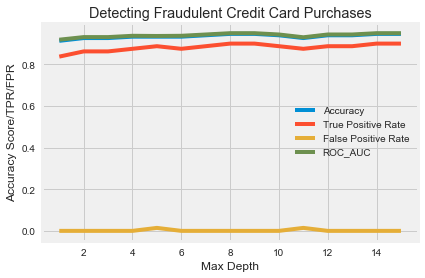

In [52]:
# Iterate through a range of max_depth values for the Random Forest Classifier
# Output the accuracy, tpr, fpr, and auroc scores against the balanced test set

max_depth_range = range(1,16)
scores = []
fprs = []
tprs = []
aurocs = []

for depth in max_depth_range:
    rf_class = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=depth)
    rf_class.fit(X_train,y_train)
    y_rf_pred = rf_class.predict(X_test)
    score = rf_class.score(X_test,y_test)
    print 'Max Depth: ', depth
    score,tpr,fpr,auroc  = advanced_metrics(rf_class,X_test,y_test)
    print '----------------------------------------------------'
    tprs.append(tpr)
    fprs.append(fpr)
    scores.append(score)
    aurocs.append(auroc)

print 'Max AUROC achieved at max_depth =', max_depth_range[aurocs.index(max(aurocs))]
print 'Max TPR achieved at max_depth =', max_depth_range[tprs.index(max(tprs))]
print 'Min FPR achieved at max_depth =', max_depth_range[fprs.index(min(fprs))]

plt.plot(max_depth_range,scores, label='Accuracy');
plt.plot(max_depth_range,tprs, label='True Positive Rate');
plt.plot(max_depth_range,fprs, label='False Positive Rate');
plt.plot(max_depth_range,aurocs, label='ROC_AUC');
plt.xlabel('Max Depth');
plt.title('Detecting Fraudulent Credit Card Purchases')
plt.ylabel('Accuracy Score/TPR/FPR');
plt.legend();

In [54]:
rf = RandomForestClassifier(n_estimators=100, max_depth=8)
# Train against
rf.fit(X_train,y_train)
print 'Calculating performance metrics on balanced test dataset...'
test_score, test_tpr,test_fpr,test_auroc = advanced_metrics(rf,X_test,y_test)
print '----------------------------------------------------'
print 'Calculating performance metrics on entire balanced dataset...'
bal_score,bal_tpr,bal_fpr,bal_auroc = advanced_metrics(rf,X,y)
print '----------------------------------------------------'
print 'Calculating performance metrics on entire original dataset...'
all_score,all_trp,all_fpr,all_auroc = advanced_metrics(rf,X_all,y_all)


Calculating performance metrics on balanced test dataset...
[[69  1]
 [ 9 71]]
True Positive Rate:  0.8875
False Positive Rate:  0.0142857142857
Accuracy Score:  0.933333333333
AUROC:  0.936607142857
----------------------------------------------------
Calculating performance metrics on entire balanced dataset...
[[249   1]
 [ 11 239]]
True Positive Rate:  0.956
False Positive Rate:  0.004
Accuracy Score:  0.976
AUROC:  0.976
----------------------------------------------------
Calculating performance metrics on entire original dataset...
[[279800   4515]
 [    44    448]]
True Positive Rate:  0.910569105691
False Positive Rate:  0.0158802736402
Accuracy Score:  0.98399266872
AUROC:  0.947344416025


***Notice that for both the balanced training set, as well as the comprehensive entire dataset, this Random Forest classifier performs better than its Logistic Regression counterpart by all relevant measures (>TPR, <=FPR, >AUROC, >Accuracy).***

In [55]:
# Display feature importances.
pd.DataFrame({'feature':top_features, 'importance':rf.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
3,V10,0.209941
2,V12,0.194693
1,V14,0.189785
0,V17,0.097638
8,V4,0.081736
7,V11,0.076959
5,V3,0.058676
4,V16,0.031328
10,Amount,0.028881
6,V7,0.018628


***Unfortunately, because our data is already PCA transformed,*** the feature importance tells us very little about the influence specific original features have on the likelihood of a purchase being fraudulent or not.  It is interesting to note, however, that the dollar amount is of relatively little importance.  This may go against the intuition that sudden, high $ amount purchases are a good indication of fraudulent activity.  Alternatively, credit card thieves may have realized that primitive fraudulent activity detection mechanisms were prone to missing lots of small purchases, as opposed to a single large purchase.

In [24]:
rf_data = cc_fraud.copy()
rf_data['rf_pred'] = rf.predict(X_all)

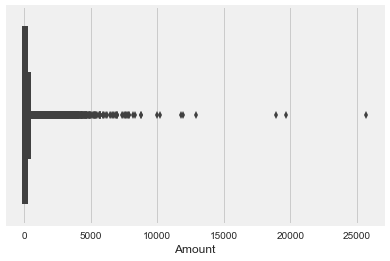

In [25]:
fps = rf_data[(rf_data.rf_pred == 1) & (rf_data['Class'] == 0)]
sns.boxplot(fps.Amount);

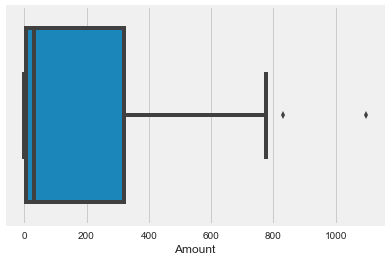

In [26]:
fns = rf_data[(rf_data.rf_pred == 0) & (rf_data['Class'] == 1)]
sns.boxplot(fns.Amount);

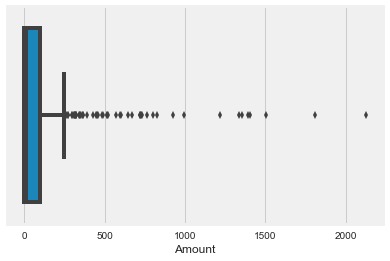

In [27]:
tps = rf_data[(rf_data.rf_pred == 1) & (rf_data['Class'] == 1)]
sns.boxplot(tps.Amount);

In [28]:
roc_auc_score(y_all,rf_data.rf_pred)

0.94312285883529212

## Does target class imbalance cause the same problems for a Random Forest classifier that we saw with Logistic Regression?



In [30]:
rf_unbalanced = RandomForestClassifier(n_estimators=100,max_depth=9)
rf_unbalanced.fit(X_all_train,y_all_train)
rf_ub_score,rf_ub_tpr,rf_ub_fpr,rf_ub_auroc = advanced_metrics(rf_unbalanced,X_all_test,y_all_test)

[[71084     5]
 [   25    88]]
True Positive Rate:  0.778761061947
False Positive Rate:  7.0334369593e-05
Accuracy Score:  0.999578663521
AUROC:  0.889345363789


***Yes and no.***  Notice that the accuracy score, similarly to before, is still very high.  This is to be expected even with a very poor classifier for our data, due to the unbalanced nature of the target values.  However, also notice that the AUROC, TPR, and FPR metrics for the unbalanced test set are significantly better for the Random Forest classifier trained on the unbalanced training set compared to the Logistic Regression model trained on the same data.

The reason for this is because the Random Forest classifier aims to maximize the node purity (according to the Gini index) in each of its base estimators, while the Logistic Regression classifier aims to maximize accuracy.  By seeking to maximize node purity, the Random Forest classifier is able to actually *learn* something about the underlying data, despite the unbalanced target classes.  Due to the way that each of the base estimators seek to partition data in a way that maximizes node purity, and the classifer aggregates these individual partitions to "vote" on specific data points, the partitions are formed in such a way that is not nearly as effected by the class imbalance compared to a Logistic Regression model.

You will also notice that, while the TPR and AUROC for this model are quite a bit lower compared to the same metrics for the  Random Forest classifier trained on the balanced training set, the FPR is in fact *better* for this model.

***Why is this the case?***

The random forest works by each base estimator "voting" on the classification of a test data point, based on how that data point evaluates in each base estimator's respective decision tree.  The randomization involved in training these base estimators means that the class imbalance *still* exercises some influence over each base estimator's "vote".  In particular, if each base estimator is formed by simply randomly partitioning the training set, then a single terminal node (leaf) is far more likely to vote to classify a new data point as the overall majority target class than the under-represented class.  So, while the Random Forest improves upon the Logistic Regression in extracting meaningful feature values on which to base classifications, it still falls victim to the influence of the class imbalance.

For this reason, we see that the Random Forest classifier trained on a balanced training/test split still performs better than its counterpart trained on a training split from the original unbalanced data.